# Pupillometry data processing
This notebook is intended to document the process to set up a pipeline for pupil diameter acquisition.

In [1]:
from scripts.conf_file_finding import try_find_conf_file
try_find_conf_file()

Local configuration file found !!, no need to run the configuration (unless configuration has changed)


In [2]:
import datajoint as dj
import os
import pathlib
import pandas as pd
import deeplabcut

/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dj.conn()
pupillometry_db = dj.create_virtual_module('pupillometry', 'u19_pupillometry')
acquisition_db = dj.create_virtual_module('acquisition', 'u19_acquisition')

Connecting alvaros@datajoint00.pni.princeton.edu:3306


In [6]:
key = dict()
key['subject_fullname'] = 'efonseca_ef111_act111'
key['session_date'] = '2023-04-25'

key_pupil = (acquisition_db.SessionVideo * pupillometry_db.PupillometrySession & key).fetch(as_dict=True)[0]
model_key = (pupillometry_db.PupillometryModels & "model_id = "+str(key_pupil['model_id'])).fetch(as_dict=True)[0]

model_key

{'model_id': 2,
 'model_description': 'Pupillometry_2023',
 'model_path': 'video_models/twolickspouts-esme-2023-06-22'}

In [7]:
key_pupil

{'subject_fullname': 'efonseca_ef111_act111',
 'session_date': datetime.date(2023, 4, 25),
 'session_number': 0,
 'video_type': 'pupillometry',
 'local_path_video_file': 'E:\\VideoData\\efonseca\\efonseca_ef111_act111\\20230425_g0\\efonseca_ef111_act111_20230425_g0.mrj.mj2',
 'remote_path_video_file': 'efonseca/efonseca_ef111_act111/20230425_g0/efonseca_ef111_act111_20230425_g0.mrj.mj2',
 'model_id': 2}

In [13]:
models_dir = dj.config.get('custom', {}).get('root_data_dir',None)
if models_dir is None:
    raise('root_data_dir in not found in config, , run initial_conf.py again')
models_dir = models_dir[0]
configPath = pathlib.Path(models_dir, model_key['model_path'],'config.yaml')

pupillometry_dir = dj.config.get('custom', {}).get('pupillometry_root_data_dir',None)

if pupillometry_dir is None:
    raise('pupillometry_root_data_dir not found in config, run initial_conf.py again')
pupillometry_raw_dir = pupillometry_dir[0]
pupillometry_processed_dir = pupillometry_dir[1]

videoPath = pathlib.Path(pupillometry_raw_dir, key_pupil['remote_path_video_file'])
output_dir = pathlib.Path(pupillometry_processed_dir,pathlib.Path(key_pupil['remote_path_video_file']).parent)
output_dir



PosixPath('/Volumes/braininit/Data/Processed/video_pupillometry/efonseca/efonseca_ef111_act111/20230425_g0')

In [14]:
configPath

PosixPath('/Volumes/braininit/Data/Raw/video_models/twolickspouts-esme-2023-06-22/config.yaml')

In [15]:
if not output_dir.exists():
    output_dir.mkdir(parents=True, exist_ok=True)

In [16]:
dj.config.get('custom', {})

{'database.prefix': 'u19_',
 'database.test.prefix': 'u19_',
 'ephys_root_data_dir': ['/Volumes/braininit/Data/Raw/electrophysiology',
  '/Volumes/braininit/Data/Processed/electrophysiology'],
 'error_logs_dir': '/Volumes/braininit/Data/Processed/LOGS/ErrorLogs',
 'imaging_root_data_dir': ['/Volumes/braininit/Data/Raw/imaging',
  '/Volumes/braininit/Data/Processed/imaging'],
 'output_logs_dir': '/Volumes/braininit/Data/Processed/LOGS/OutputLogs',
 'root_data_dir': ['/Volumes/braininit/Data/Raw',
  '/Volumes/braininit/Data/Processed'],
 'video_root_data_dir': ['/Volumes/braininit/Data/Raw/video_acquisition',
  '/Volumes/braininit/Data/Processed/video_acquisition'],
 'temporary_processed_data': 'braininit/Data/TemporaryProcessed/',
 'behavior_root_data_dir': '/Volumes/braininit/Data/Raw/behavior',
 'pupillometry_root_data_dir': ['/Volumes/braininit/Data/Raw/video_pupillometry',
  '/Volumes/braininit/Data/Processed/video_pupillometry']}

In [18]:
deeplabcut.analyze_videos(configPath.as_posix(), videoPath.as_posix(), destfolder=output_dir.as_posix())

Using snapshot-100000 for model /Volumes/braininit/Data/Raw/video_models/twolickspouts-esme-2023-06-22/dlc-models/iteration-0/twolickspoutsJun22-trainset95shuffle1


/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Starting to analyze %  /Volumes/braininit/Data/Raw/video_pupillometry/efonseca/efonseca_ef111_act111/20230425_g0/efonseca_ef111_act111_20230425_g0.mrj.mj2
Loading  /Volumes/braininit/Data/Raw/video_pupillometry/efonseca/efonseca_ef111_act111/20230425_g0/efonseca_ef111_act111_20230425_g0.mrj.mj2
Duration of video [s]:  3610.57 , recorded with  30.0 fps!
Overall # of frames:  108317  found with (before cropping) frame dimensions:  720 540
Starting to extract posture


  2%|▏         | 2166/108317 [18:35<15:40:36,  1.88it/s]

In [5]:
dj.conn()
acquisition_db = dj.create_virtual_module('acquisition', 'u19_acquisition')
#pupillometry_db = dj.create_virtual_module('pupillometry', 'u19_pupillometry')

/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future vers

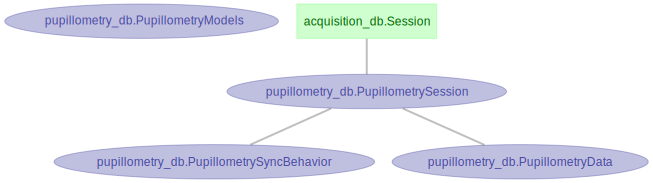

In [6]:
dj.ERD(pupillometry_db) -1

In [4]:
root_videopath = dj.config['custom']['dlc_root_data_dir2']

modelPath = pathlib.Path(root_videopath, 'MODELS', 'Pupillometry2-Ryan-2022-04-07').as_posix()
configPath = pathlib.Path(modelPath,'config.yaml').as_posix()

proccesed_rootpath = dj.config['custom']['dlc_processed_data_dir2']
proccesed_rootpath = pathlib.Path(proccesed_rootpath, 'pupillometry').as_posix()
configPath

'/scratch/gpfs/BRAINCOGS/Data/Raw/video_acquisition/MODELS/Pupillometry2-Ryan-2022-04-07/config.yaml'

In [5]:
key = 'subject_fullname like "jounhong%"'
video_data_df = pd.DataFrame((pupillometry_db.PupillometrySession * acquisition_db.SessionVideo & key).fetch("KEY", 'remote_path_video_file', as_dict=True))

video_data_df['remote_path_video_file'] = 'pupillometry/' + video_data_df['remote_path_video_file']
video_data_df.loc[0,'remote_path_video_file']

video_data_df['processed_path'] = video_data_df['remote_path_video_file'].apply(lambda x : pathlib.Path(x).parent.as_posix())

video_data_df

,subject_fullname,session_date,session_number,video_type,remote_path_video_file,processed_path
0,jounhong_TH_276,2022-04-01,0,pupillometry,pupillometry/jounhong/jounhong_TH_276/20220401...,pupillometry/jounhong/jounhong_TH_276/20220401_g0
1,jounhong_TH_276,2022-04-02,0,pupillometry,pupillometry/jounhong/jounhong_TH_276/20220402...,pupillometry/jounhong/jounhong_TH_276/20220402_g0
2,jounhong_TH_276,2022-04-03,0,pupillometry,pupillometry/jounhong/jounhong_TH_276/20220403...,pupillometry/jounhong/jounhong_TH_276/20220403_g0
3,jounhong_TH_276,2022-04-04,0,pupillometry,pupillometry/jounhong/jounhong_TH_276/20220404...,pupillometry/jounhong/jounhong_TH_276/20220404_g0
4,jounhong_TH_276,2022-04-05,0,pupillometry,pupillometry/jounhong/jounhong_TH_276/20220405...,pupillometry/jounhong/jounhong_TH_276/20220405_g0
5,jounhong_TH_276,2022-04-06,0,pupillometry,pupillometry/jounhong/jounhong_TH_276/20220406...,pupillometry/jounhong/jounhong_TH_276/20220406_g0
6,jounhong_TH_276,2022-04-07,0,pupillometry,pupillometry/jounhong/jounhong_TH_276/20220407...,pupillometry/jounhong/jounhong_TH_276/20220407_g0
7,jounhong_TH_276,2022-04-08,0,pupillometry,pupillometry/jounhong/jounhong_TH_276/20220408...,pupillometry/jounhong/jounhong_TH_276/20220408_g0
8,jounhong_TH_276,2022-04-11,0,pupillometry,pupillometry/jounhong/jounhong_TH_276/20220411...,pupillometry/jounhong/jounhong_TH_276/20220411_g0
9,jounhong_TH_276,2022-04-12,0,pupillometry,pupillometry/jounhong/jounhong_TH_276/20220412...,pupillometry/jounhong/jounhong_TH_276/20220412_g0


In [6]:
'''
for i in range(video_data_df.shape[0]-1,0,-1):
    this_video_path = pathlib.Path(root_videopath, video_data_df.loc[i, 'remote_path_video_file']).as_posix()
    this_results_path = pathlib.Path(proccesed_rootpath, video_data_df.loc[i, 'processed_path']).as_posix()

    pathlib.Path(this_results_path).mkdir(parents=True, exist_ok=True)

    print(this_video_path)
    print(this_results_path)
    deeplabcut.analyze_videos(configPath, this_video_path, destfolder=this_results_path)
'''

"\nfor i in range(video_data_df.shape[0]-1,0,-1):\n    this_video_path = pathlib.Path(root_videopath, video_data_df.loc[i, 'remote_path_video_file']).as_posix()\n    this_results_path = pathlib.Path(proccesed_rootpath, video_data_df.loc[i, 'processed_path']).as_posix()\n\n    pathlib.Path(this_results_path).mkdir(parents=True, exist_ok=True)\n\n    print(this_video_path)\n    print(this_results_path)\n    deeplabcut.analyze_videos(configPath, this_video_path, destfolder=this_results_path)\n"

In [7]:
'''
import u19_pipeline.utils.dlc_process as dlc


for i in range(video_data_df.shape[0]-1,0,-1):
    this_results_path = pathlib.Path(proccesed_rootpath, video_data_df.loc[i, 'processed_path']).as_posix()
    print(this_results_path)
    try:
        dlc.getPupilDiameter(destinationFolder=this_results_path)
    except BaseException as e:
        print(str(e))
'''

"\nimport u19_pipeline.utils.dlc_process as dlc\n\n\nfor i in range(video_data_df.shape[0]-1,0,-1):\n    this_results_path = pathlib.Path(proccesed_rootpath, video_data_df.loc[i, 'processed_path']).as_posix()\n    print(this_results_path)\n    try:\n        dlc.getPupilDiameter(destinationFolder=this_results_path)\n    except BaseException as e:\n        print(str(e))\n"

In [8]:
'''
import u19_pipeline.automatic_job.clusters_paths_and_transfers as ft
import u19_pipeline.automatic_job.slurm_creator as sc
import subprocess
import u19_pipeline.automatic_job.params_config as config
import re
from u19_pipeline.utils.file_utils import write_file

repo_dir = '/usr/people/alvaros/BrainCogsProjects/Datajoint_projs/U19-pipeline_python'
script_path = pathlib.Path(repo_dir, 'u19_pipeline/utils/dlc_process.py').as_posix()

slurms_filepath = pathlib.Path(repo_dir, 'u19_pipeline/automatic_job/SlurmFiles').as_posix()
default_slurm_filename = 'slurm_real_spock.slurm'

for i in range(8, video_data_df.shape[0]):
    this_video_path = pathlib.Path(root_videopath, video_data_df.loc[i, 'remote_path_video_file']).as_posix()
    this_results_path = pathlib.Path(proccesed_rootpath, video_data_df.loc[i, 'processed_path']).as_posix()

    recording_process_id = str(i)

    #Get all associated directories given the selected processing cluster
    cluster_vars = ft.get_cluster_vars('spock')

    # Start with default values
    slurm_dict = cluster_vars['slurm_default'].copy()
    label_rec_process = 'rec'+recording_process_id
    print('label_rec_process', label_rec_process)
    slurm_dict['job-name'] = label_rec_process
    slurm_dict['output'] = str(pathlib.Path(cluster_vars['log_files_dir'],label_rec_process+ '.log'))
    slurm_text = sc.generate_slurm_dlc(slurm_dict)

    slurm_file_name = default_slurm_filename
    slurm_file_local_path = pathlib.Path(slurms_filepath,slurm_file_name).as_posix()

    write_file(slurm_file_local_path, slurm_text)

    #Get all associated variables given the selected processing cluster
    cluster_vars = ft.get_cluster_vars('spock')
        
    processed_data_directory = pathlib.Path(this_results_path).as_posix()
    repository_dir = repo_dir

    command = ['sbatch', 
    "--export=recording_process_id="+recording_process_id+
    ",raw_data_directory="+this_video_path+
    ",processed_data_directory="+processed_data_directory+
    ",repository_dir='"+repository_dir+
    "',process_script_path="+script_path+
    ",model_path="+modelPath
    , slurm_file_local_path
    ]

    print(command)
    p = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    #p = os.popen(command_new).read()
    p.wait()
    stdout, stderr = p.communicate()
    print('stdout', stdout.decode('UTF-8'))
    print('stderr', stderr.decode('UTF-8'))
    print('p.returncode', p.returncode)

    if p.returncode == config.system_process['SUCCESS']:
        batch_job_sentence = stdout.decode('UTF-8')
        print('batch_job_sentence', batch_job_sentence)
        id_slurm_job   = batch_job_sentence.replace("Submitted batch job ","")
        id_slurm_job   = re.sub(r"[\n\t\s]*", "", id_slurm_job)



'''

'\nimport u19_pipeline.automatic_job.clusters_paths_and_transfers as ft\nimport u19_pipeline.automatic_job.slurm_creator as sc\nimport subprocess\nimport u19_pipeline.automatic_job.params_config as config\nimport re\nfrom u19_pipeline.utils.file_utils import write_file\n\nrepo_dir = \'/usr/people/alvaros/BrainCogsProjects/Datajoint_projs/U19-pipeline_python\'\nscript_path = pathlib.Path(repo_dir, \'u19_pipeline/utils/dlc_process.py\').as_posix()\n\nslurms_filepath = pathlib.Path(repo_dir, \'u19_pipeline/automatic_job/SlurmFiles\').as_posix()\ndefault_slurm_filename = \'slurm_real_spock.slurm\'\n\nfor i in range(8, video_data_df.shape[0]):\n    this_video_path = pathlib.Path(root_videopath, video_data_df.loc[i, \'remote_path_video_file\']).as_posix()\n    this_results_path = pathlib.Path(proccesed_rootpath, video_data_df.loc[i, \'processed_path\']).as_posix()\n\n    recording_process_id = str(i)\n\n    #Get all associated directories given the selected processing cluster\n    cluster_va

In [9]:
import u19_pipeline.automatic_job.clusters_paths_and_transfers as ft

def transfer_slurm_file(slurm_file_local_path, slurm_destination, cluster_vars):
    '''
    Create scp command from cluster directories and local slurm file
    '''

    user_host = cluster_vars['user']+'@'+cluster_vars['hostname']
    slurm_destination = user_host+':'+slurm_destination
    status = ft.scp_file_transfer(slurm_file_local_path, slurm_destination)

    return status

In [10]:
import u19_pipeline.automatic_job.clusters_paths_and_transfers as ft
import u19_pipeline.automatic_job.slurm_creator as sc
import subprocess
import u19_pipeline.automatic_job.params_config as config
import re
from u19_pipeline.utils.file_utils import write_file

repo_dir = '/scratch/gpfs/BRAINCOGS/U19-pipeline_python'
script_path = pathlib.Path(repo_dir, 'u19_pipeline/utils/dlc_process.py').as_posix()

local_repo_dir = '/Users/alvaros/Documents/MATLAB/BrainCogsProjects/Datajoint_proj/U19-pipeline_python/'

slurms_filepath = pathlib.Path(local_repo_dir, 'u19_pipeline/automatic_job/SlurmFiles').as_posix()
default_slurm_filename = 'slurm_real.slurm'

for i in range(9, 10):
    this_video_path = pathlib.Path(root_videopath, video_data_df.loc[i, 'remote_path_video_file']).as_posix()
    this_results_path = pathlib.Path(proccesed_rootpath, video_data_df.loc[i, 'processed_path']).as_posix()

    recording_process_id = str(i)

    #Get all associated directories given the selected processing cluster
    cluster_vars = ft.get_cluster_vars('tiger')

    # Start with default values
    slurm_dict = cluster_vars['slurm_default'].copy()
    label_rec_process = 'rec'+recording_process_id
    print('label_rec_process', label_rec_process)
    slurm_dict['job-name'] = label_rec_process
    slurm_dict['output'] = str(pathlib.Path(cluster_vars['log_files_dir'],label_rec_process+ '.log'))
    slurm_text = sc.generate_slurm_dlc2(slurm_dict)

    slurm_file_name = default_slurm_filename
    slurm_file_local_path = pathlib.Path(slurms_filepath,slurm_file_name).as_posix()

    write_file(slurm_file_local_path, slurm_text)

    slurm_destination = pathlib.Path(cluster_vars['slurm_files_dir'], slurm_file_name).as_posix()

    print(slurm_file_local_path)
    print(slurm_destination)
    print(cluster_vars)

    status = transfer_slurm_file(slurm_file_local_path, slurm_destination, cluster_vars)
            
    processed_data_directory = pathlib.Path(this_results_path).as_posix()
    repository_dir = repo_dir

    command = ['ssh', cluster_vars['user']+"@"+cluster_vars['hostname'], 'sbatch', 
    "--export=recording_process_id="+recording_process_id+
    ",raw_data_directory="+this_video_path+
    ",processed_data_directory="+processed_data_directory+
    ",repository_dir='"+repository_dir+
    "',process_script_path="+script_path+
    ",model_path="+modelPath
    , slurm_destination
    ]

    print(command)
    p = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    #p = os.popen(command_new).read()
    p.wait()
    stdout, stderr = p.communicate()
    print('stdout', stdout.decode('UTF-8'))
    print('stderr', stderr.decode('UTF-8'))
    print('p.returncode', p.returncode)

    if p.returncode == config.system_process['SUCCESS']:
        batch_job_sentence = stdout.decode('UTF-8')
        print('batch_job_sentence', batch_job_sentence)
        id_slurm_job   = batch_job_sentence.replace("Submitted batch job ","")
        id_slurm_job   = re.sub(r"[\n\t\s]*", "", id_slurm_job)



label_rec_process rec9
/Users/alvaros/Documents/MATLAB/BrainCogsProjects/Datajoint_proj/U19-pipeline_python/u19_pipeline/automatic_job/SlurmFiles/slurm_real.slurm
/scratch/gpfs/BRAINCOGS/SlurmFiles/slurm_real.slurm
{'home_dir': '/scratch/gpfs/BRAINCOGS', 'root_data_dir': '/scratch/gpfs/BRAINCOGS/Data/Raw', 'sorted_data_dir': '/scratch/gpfs/BRAINCOGS/Data/Sorted', 'slurm_files_dir': '/scratch/gpfs/BRAINCOGS/SlurmFiles', 'params_files_dir': '/scratch/gpfs/BRAINCOGS/ParameterFiles', 'electrophysiology_process_dir': '/scratch/gpfs/BRAINCOGS/electorphysiology_processing', 'imaging_process_dir': '/scratch/gpfs/BRAINCOGS/imaging_processing', 'log_files_dir': '/scratch/gpfs/BRAINCOGS/OutputLog', 'user': 'alvaros', 'slurm_default': {'job-name': 'kilosort2', 'nodes': 2, 'ntasks': 2, 'time': '5:00:00', 'mem': '200G', 'gres': 'gpu:2', 'mail-user': 'alvaros@princeton.edu', 'mail-type': ['END'], 'output': 'OutputLog/recording_process_${recording_process_id}".log'}, 'hostname': 'tigergpu.princeton.ed